<span style="font-size:27px; color:blue">**Appliances Energy Prediction Analysis**</span>

## Import Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV

## Exploratory Data Analysis

### Read Dataset

In [3]:
# Load the dataset
file_path = r"C:\Users\Zuu Zuu Kyaw Shwe\Desktop\Data Mining and Machine Learning\Project\appliances+energy+prediction\energydata_complete.csv"
df = pd.read_csv(file_path)

In [5]:
# Show the dataframe dimension
df.shape

(19735, 29)

In [7]:
# Show the first few rows of the dataframe
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [9]:
# Display dataset's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [11]:
# Show statistical summary for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


### Data Cleaning

In [13]:
# Check for duplicates in the dataset
df.duplicated().sum()

0

In [15]:
# Check for missing values in the dataset
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [17]:
# Convert 'date' to datetime and extract temporal features
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday

# Drop the original 'date' column as it's now redundant
df.drop(columns=['date'], inplace=True)

In [19]:
# Divide columns into the specified categories
col_temp = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]
col_hum = ["RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"]
col_weather = ["T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility"]
col_light = ["lights"]
col_randoms = ["rv1","rv2"]
col_target = ["Appliances"]

categorized_data = {
    "Temperature Features": df[col_temp],
    "Humidity Features": df[col_hum],
    "Weather Features": df[col_weather],
    "Light Features": df[col_light],
    "Random Features": df[col_randoms],
    "Target Feature": df[col_target],
}
categorized_data.keys()

dict_keys(['Temperature Features', 'Humidity Features', 'Weather Features', 'Light Features', 'Random Features', 'Target Feature'])

In [21]:
# Separate dependent and independent variables
feature_variables = df[col_temp + col_hum + col_weather + col_light + col_randoms]
target_variables = df[col_target]

### Data Visualization

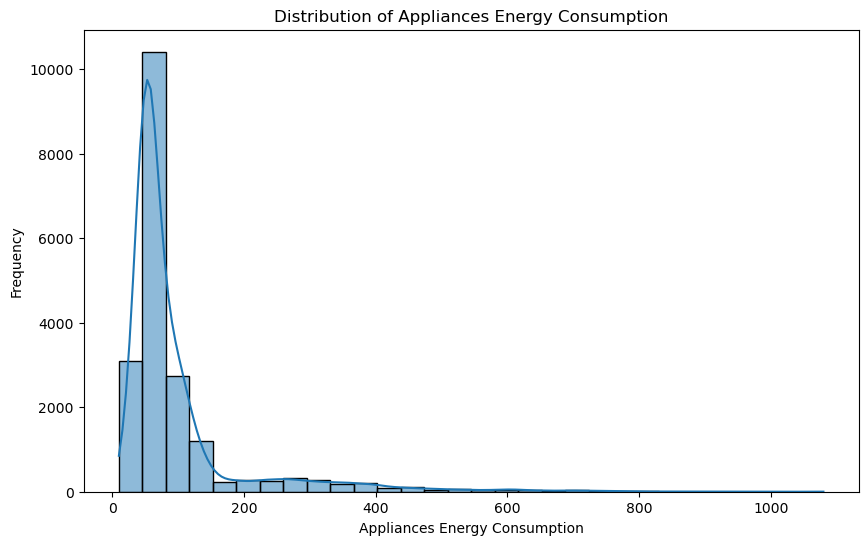

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=target_variables, x='Appliances', kde=True, bins=30)
plt.xlabel('Appliances Energy Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Appliances Energy Consumption')
plt.show()

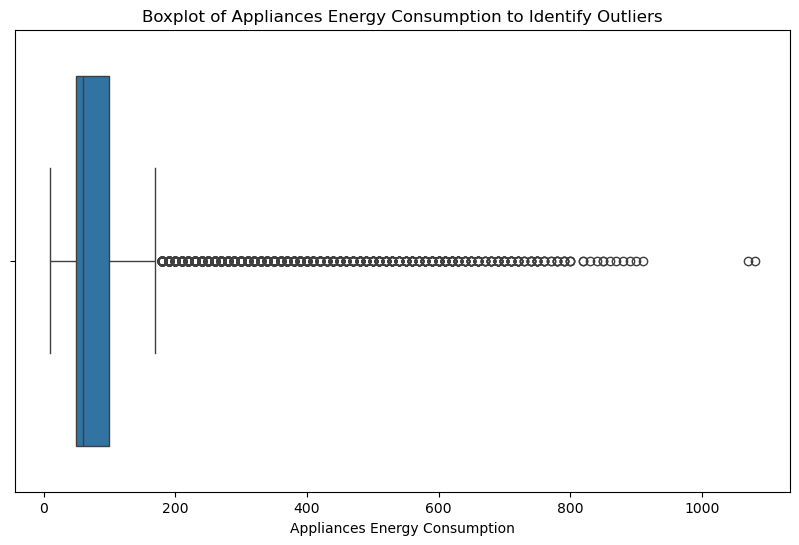

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=target_variables, x='Appliances')
plt.xlabel('Appliances Energy Consumption')
plt.title('Boxplot of Appliances Energy Consumption to Identify Outliers')
plt.show()

In [28]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = target_variables['Appliances'].quantile(0.25)
Q3 = target_variables['Appliances'].quantile(0.75)

IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Identify outliers
outliers = target_variables[(target_variables['Appliances'] < lower_bound) | (target_variables['Appliances'] > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")

print(outliers)

Lower Bound: -25.0, Upper Bound: 175.0
Number of outliers detected: 2138
       Appliances
10            230
11            580
12            430
13            250
21            190
...           ...
19725         220
19726         180
19732         270
19733         420
19734         430

[2138 rows x 1 columns]


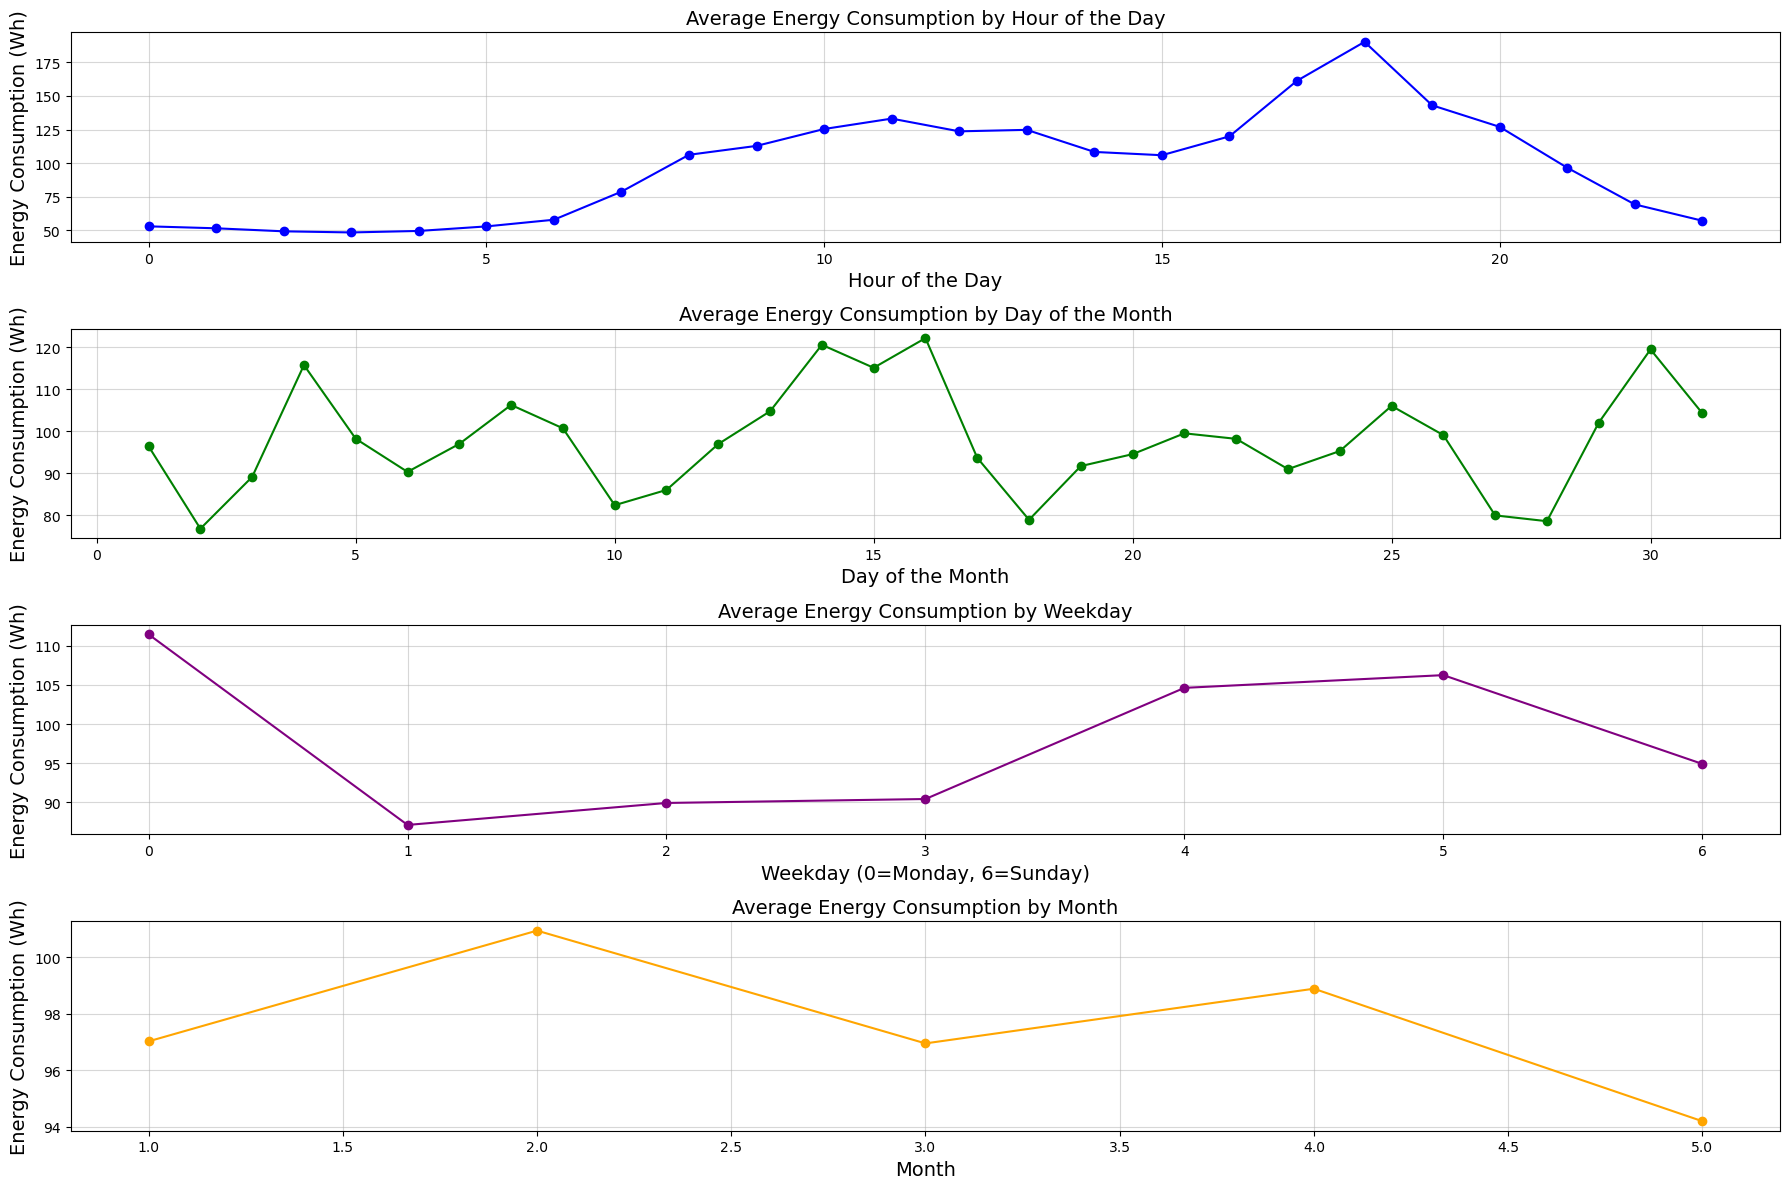

In [30]:
# Calculate hourly, daily, weekly, and monthly trends for energy consumption
hourly_trends = df.groupby('hour')['Appliances'].mean()
daily_trends = df.groupby('day')['Appliances'].mean()
weekly_trends = df.groupby('weekday')['Appliances'].mean()
monthly_trends = df.groupby('month')['Appliances'].mean()

plt.figure(figsize=(18, 12))

# Hourly trends
plt.subplot(4, 1, 1)
hourly_trends.plot(kind='line', marker='o', color='blue')
plt.title('Average Energy Consumption by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Energy Consumption (Wh)', fontsize=14)
plt.grid(alpha=0.5)

# Daily trends
plt.subplot(4, 1, 2)
daily_trends.plot(kind='line', marker='o', color='green')
plt.title('Average Energy Consumption by Day of the Month', fontsize=14)
plt.xlabel('Day of the Month', fontsize=14)
plt.ylabel('Energy Consumption (Wh)', fontsize=14)
plt.grid(alpha=0.5)

# Weekly trends
plt.subplot(4, 1, 3)
weekly_trends.plot(kind='line', marker='o', color='purple')
plt.title('Average Energy Consumption by Weekday', fontsize=14)
plt.xlabel('Weekday (0=Monday, 6=Sunday)', fontsize=14)
plt.ylabel('Energy Consumption (Wh)', fontsize=14)
plt.grid(alpha=0.5)

# Monthly trends
plt.subplot(4, 1, 4)
monthly_trends.plot(kind='line', marker='o', color='orange')
plt.title('Average Energy Consumption by Month', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Energy Consumption (Wh)', fontsize=14)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

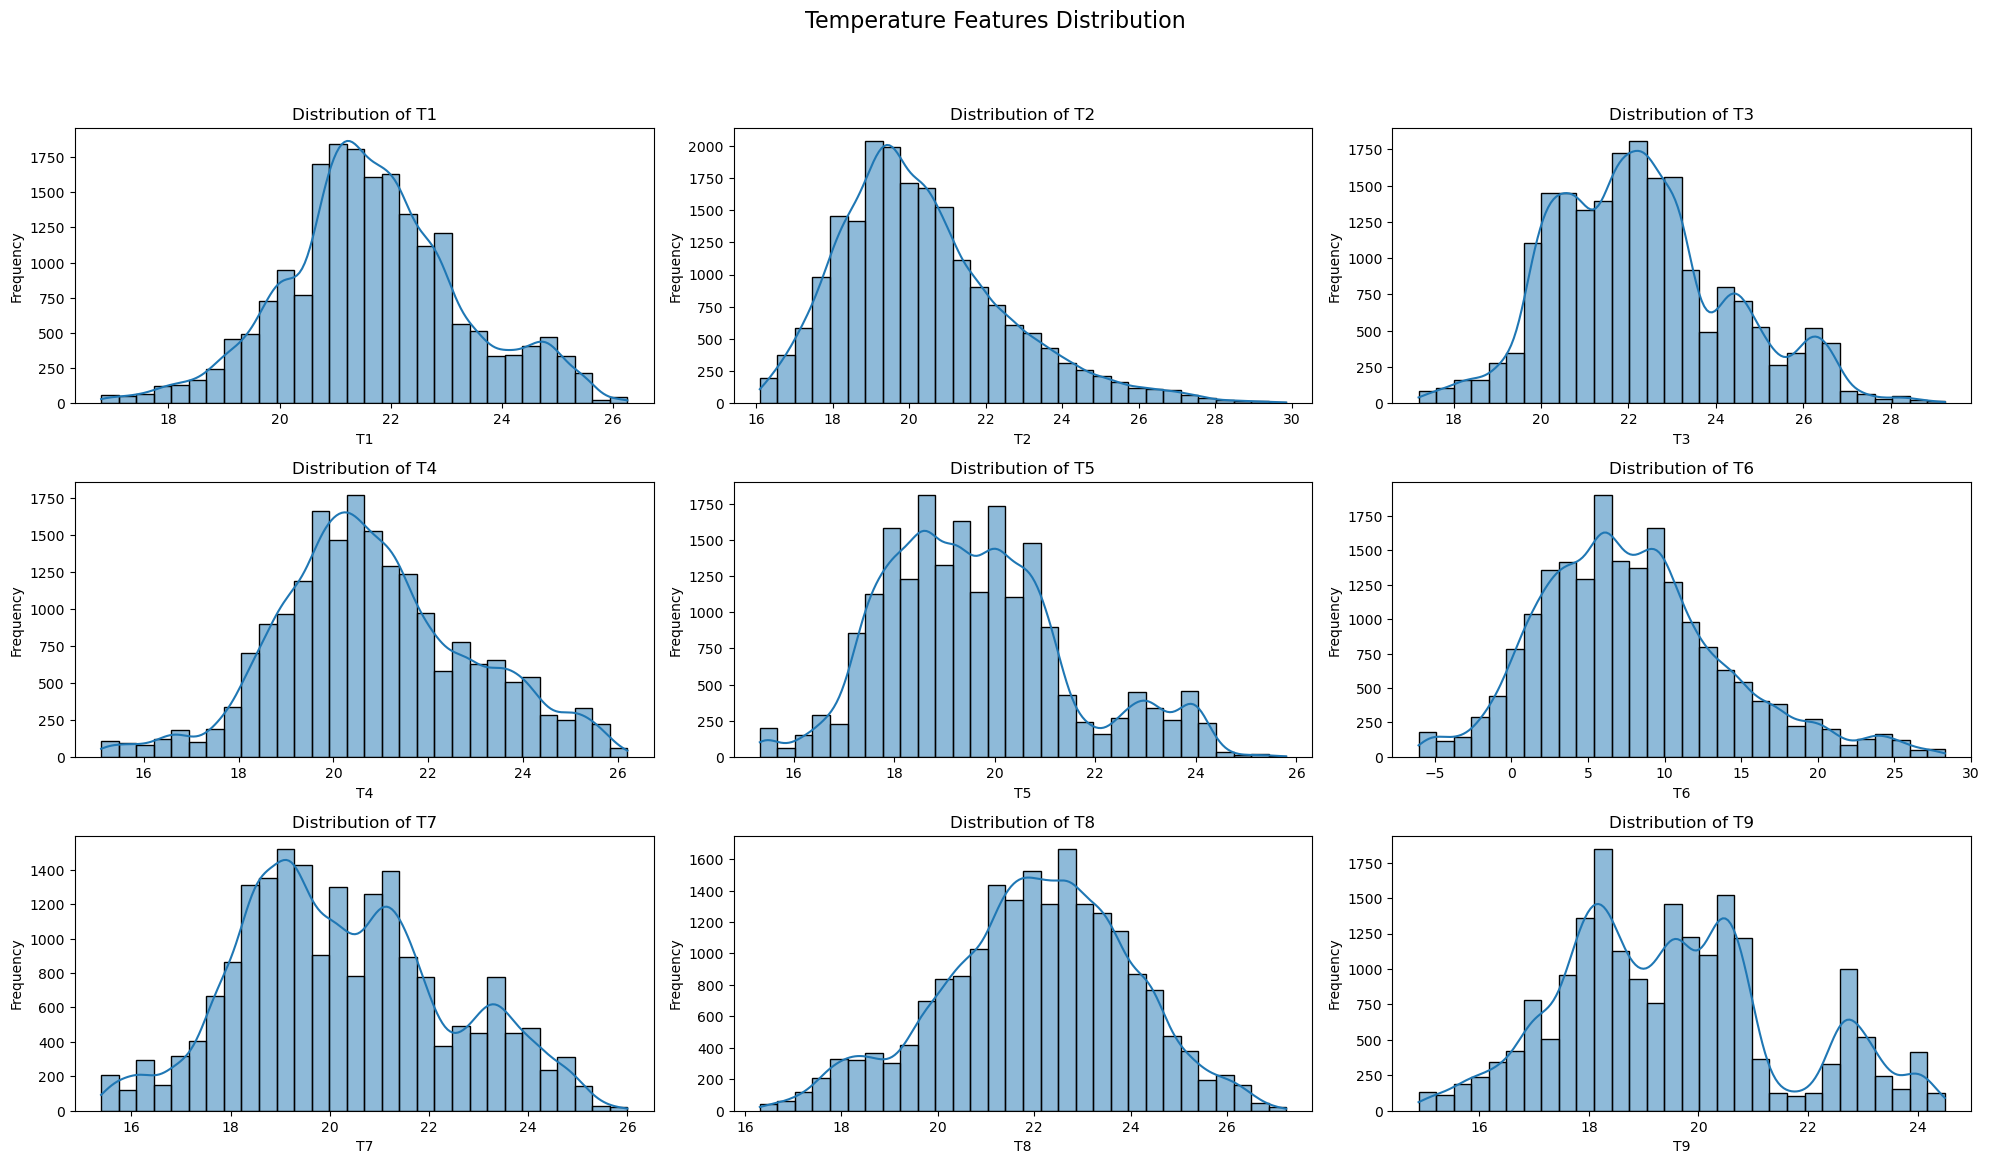

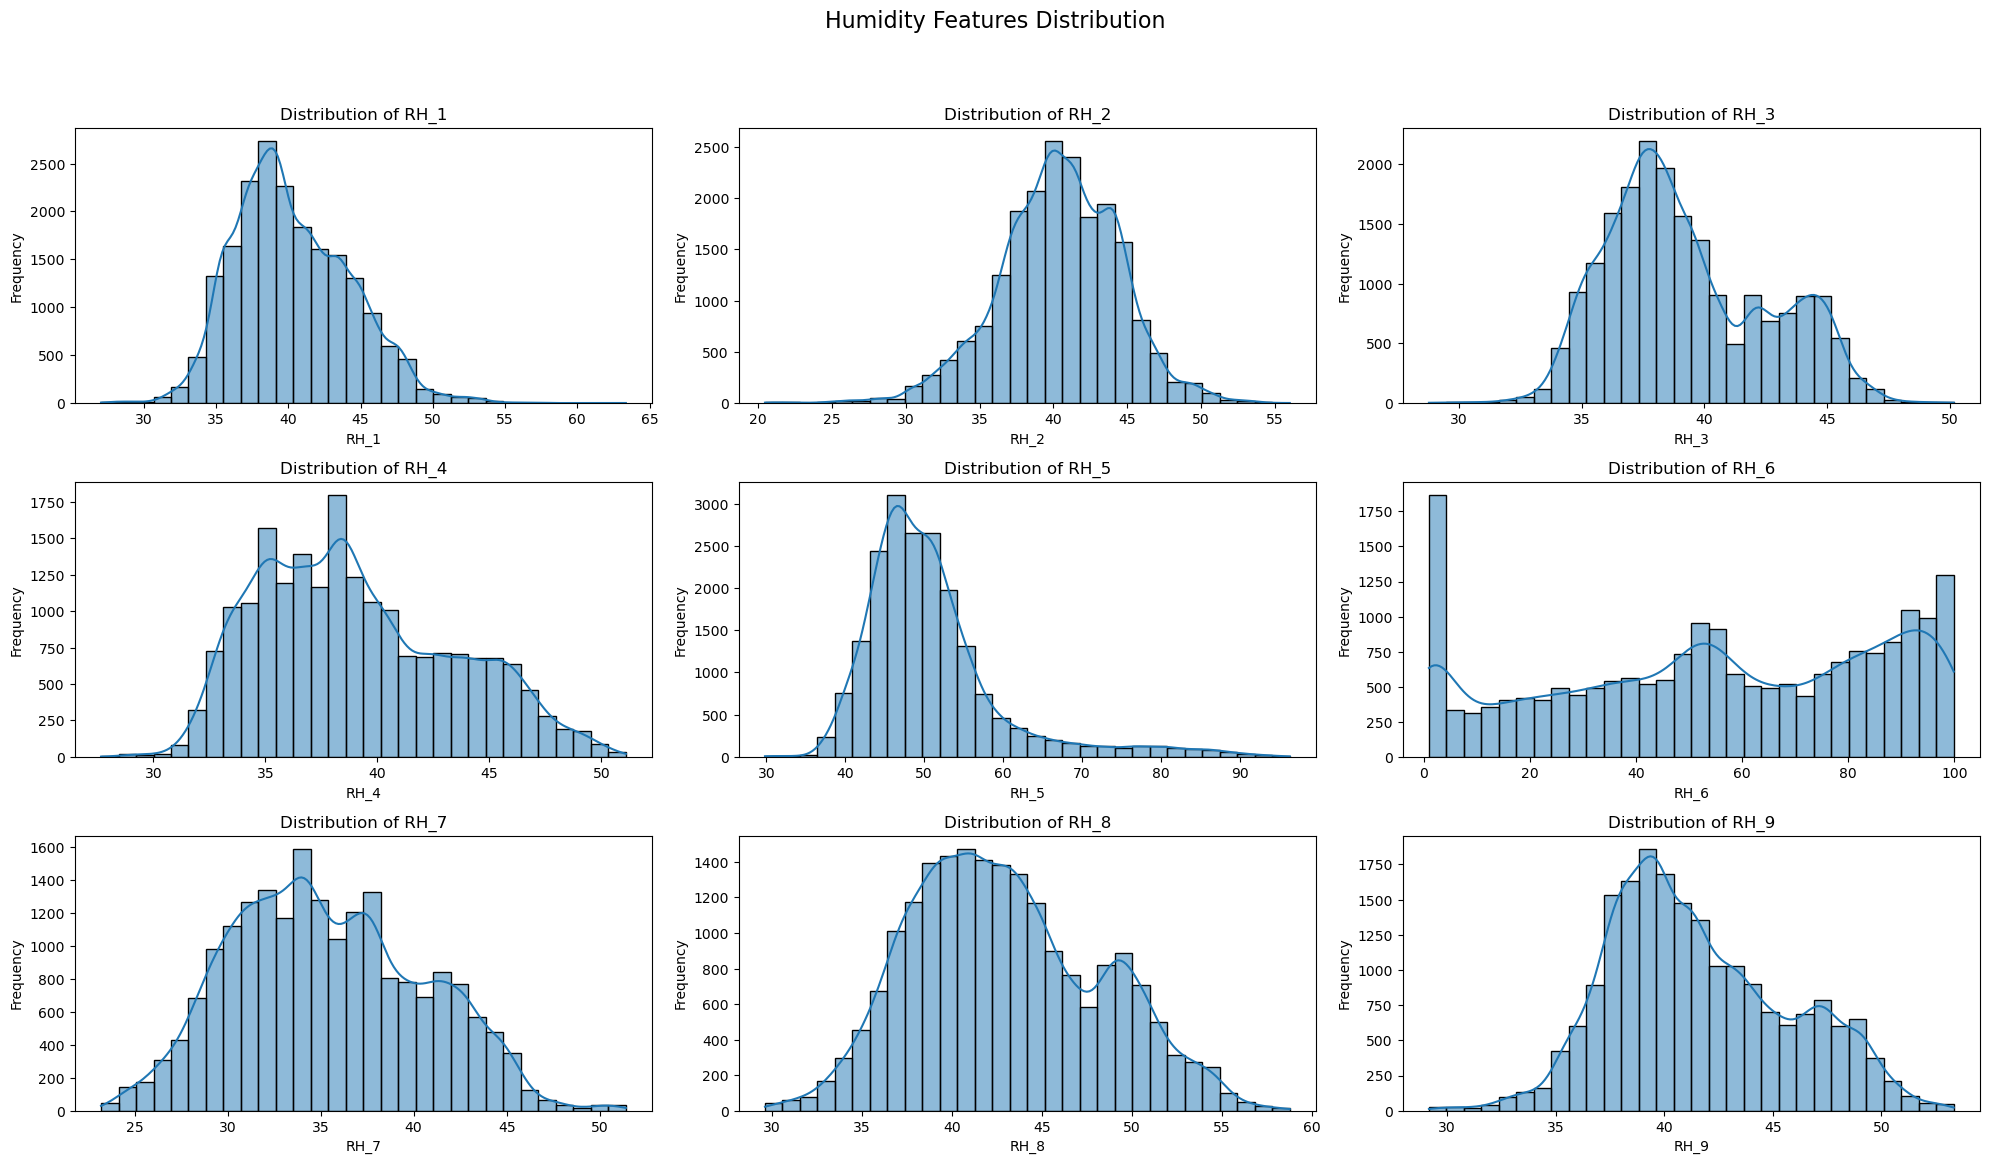

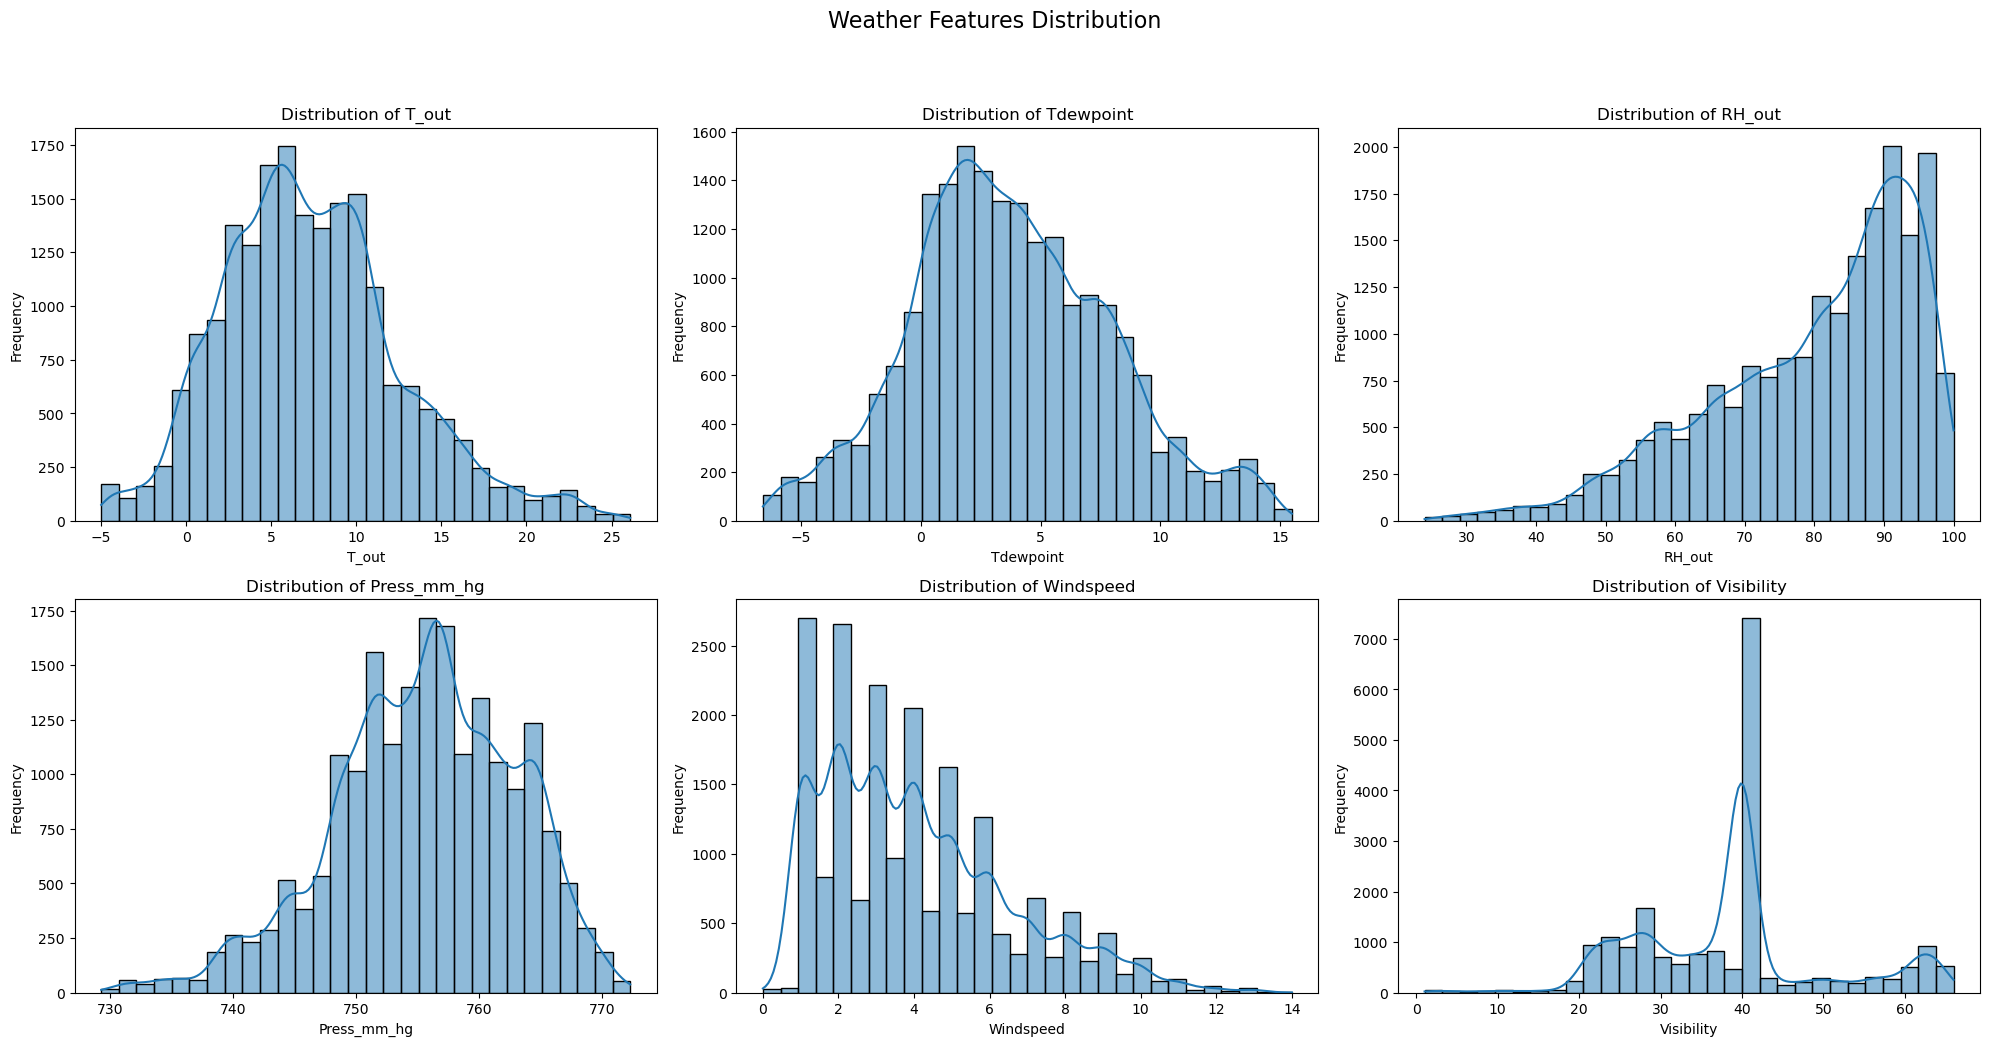

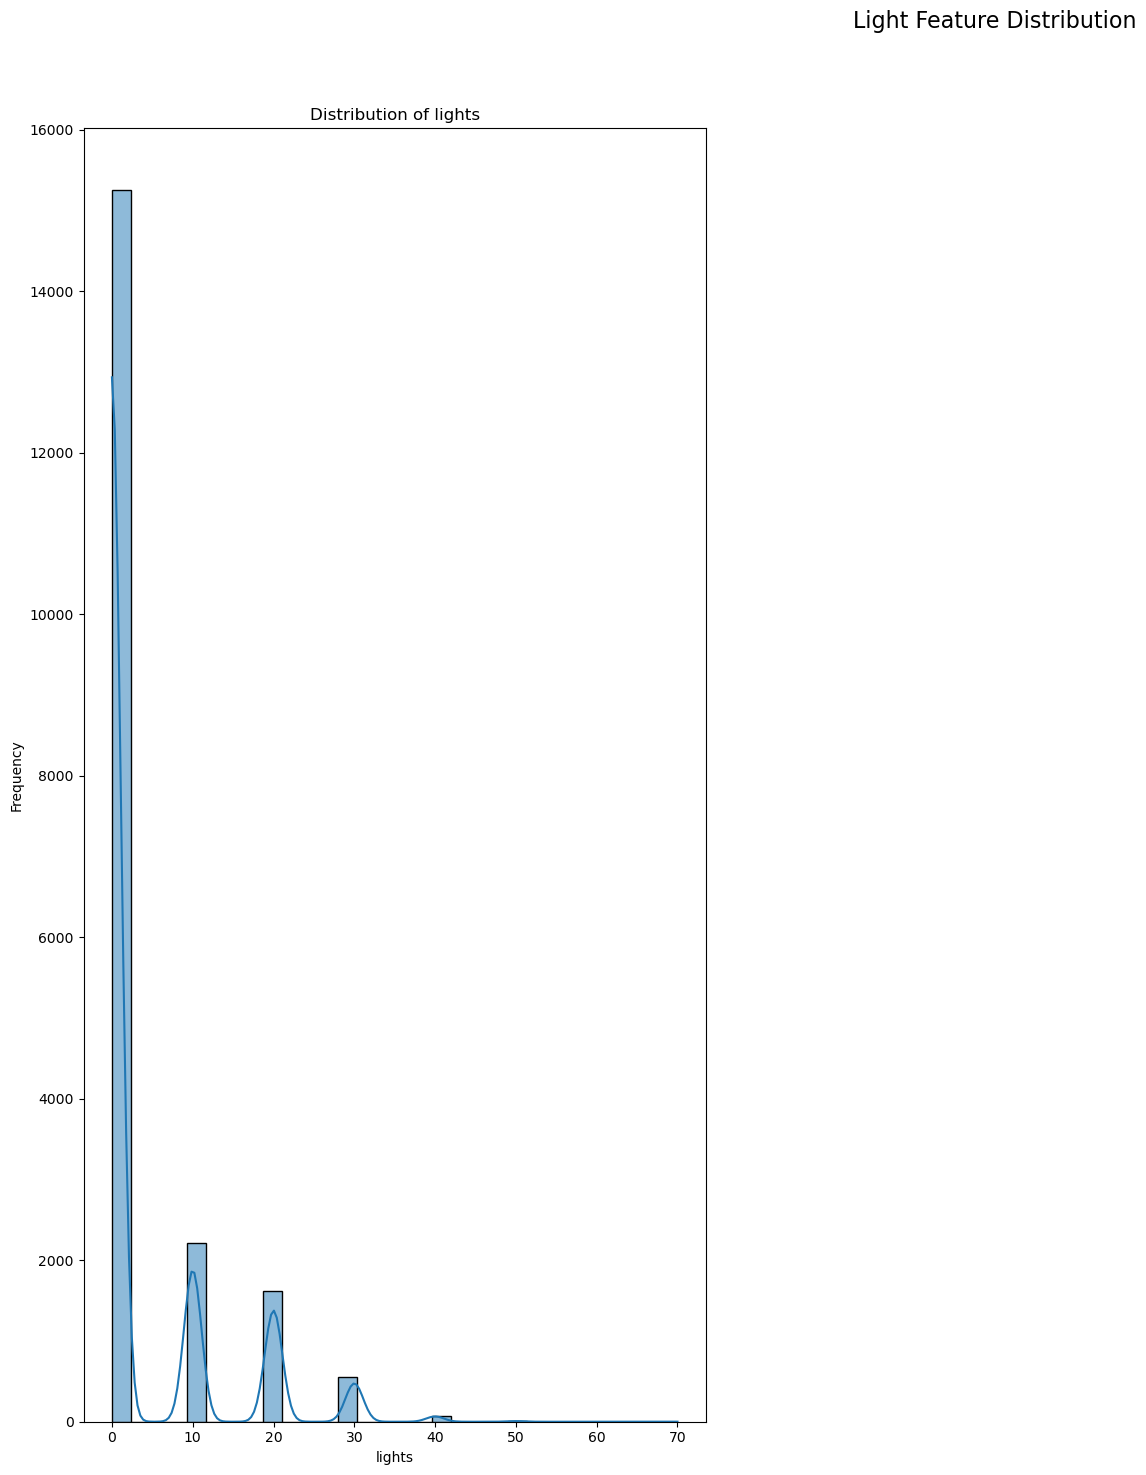

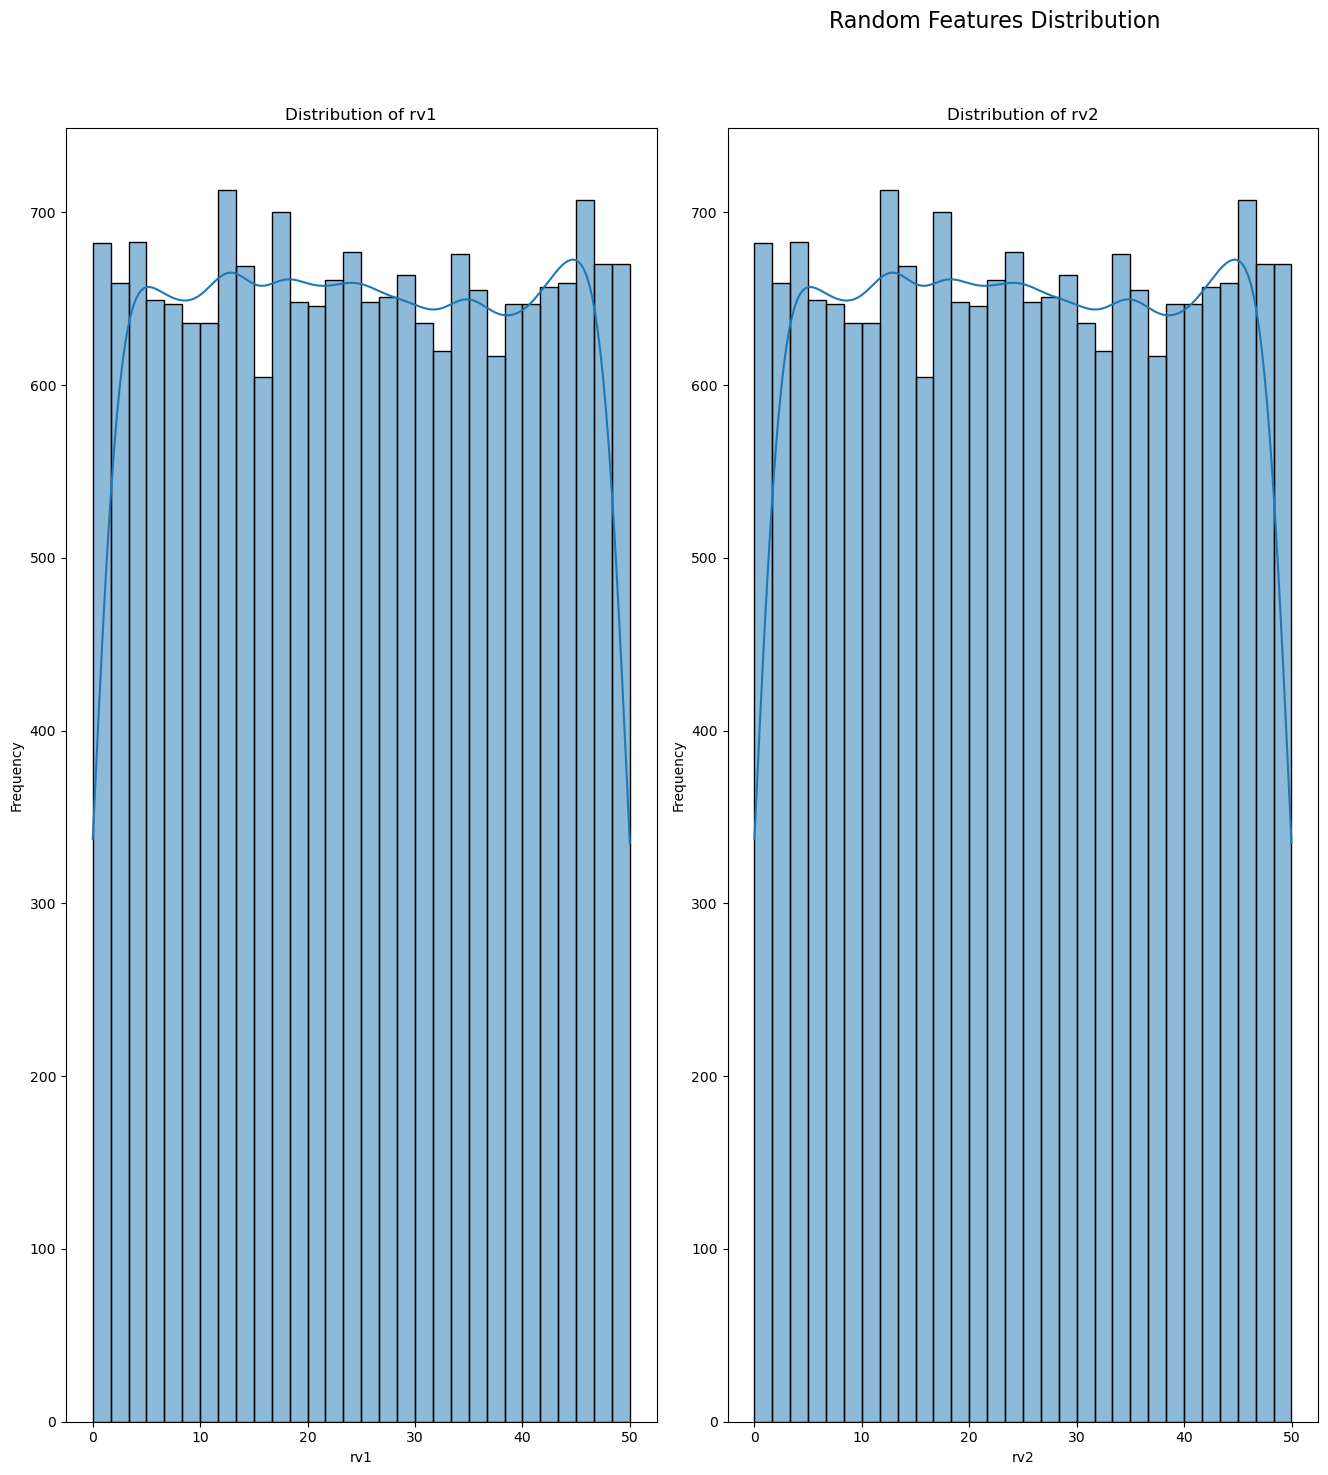

In [32]:
# Function to plot distributions for a given set of features
def plot_distributions(features, title):
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(features):
        plt.subplot(len(features) // 3 + 1, 3, i + 1) 
        sns.histplot(df[feature], kde=True, bins=30)
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {feature}')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_distributions(col_temp, "Temperature Features Distribution")
plot_distributions(col_hum, "Humidity Features Distribution")
plot_distributions(col_weather, "Weather Features Distribution")
plot_distributions(col_light, "Light Feature Distribution")
plot_distributions(col_randoms, "Random Features Distribution")

### Log Transform

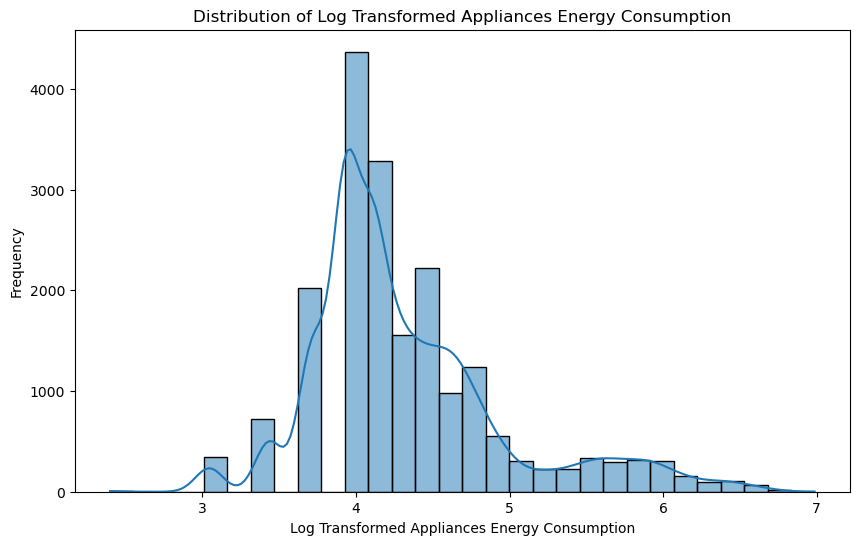

In [34]:
# Log transform the target variable to reduce skewness
df['Appliances'] = np.log1p(df['Appliances'])  # log1p is used to handle log(0) and compress the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Appliances'], kde=True, bins=30)
plt.xlabel('Log Transformed Appliances Energy Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Log Transformed Appliances Energy Consumption')
plt.show()

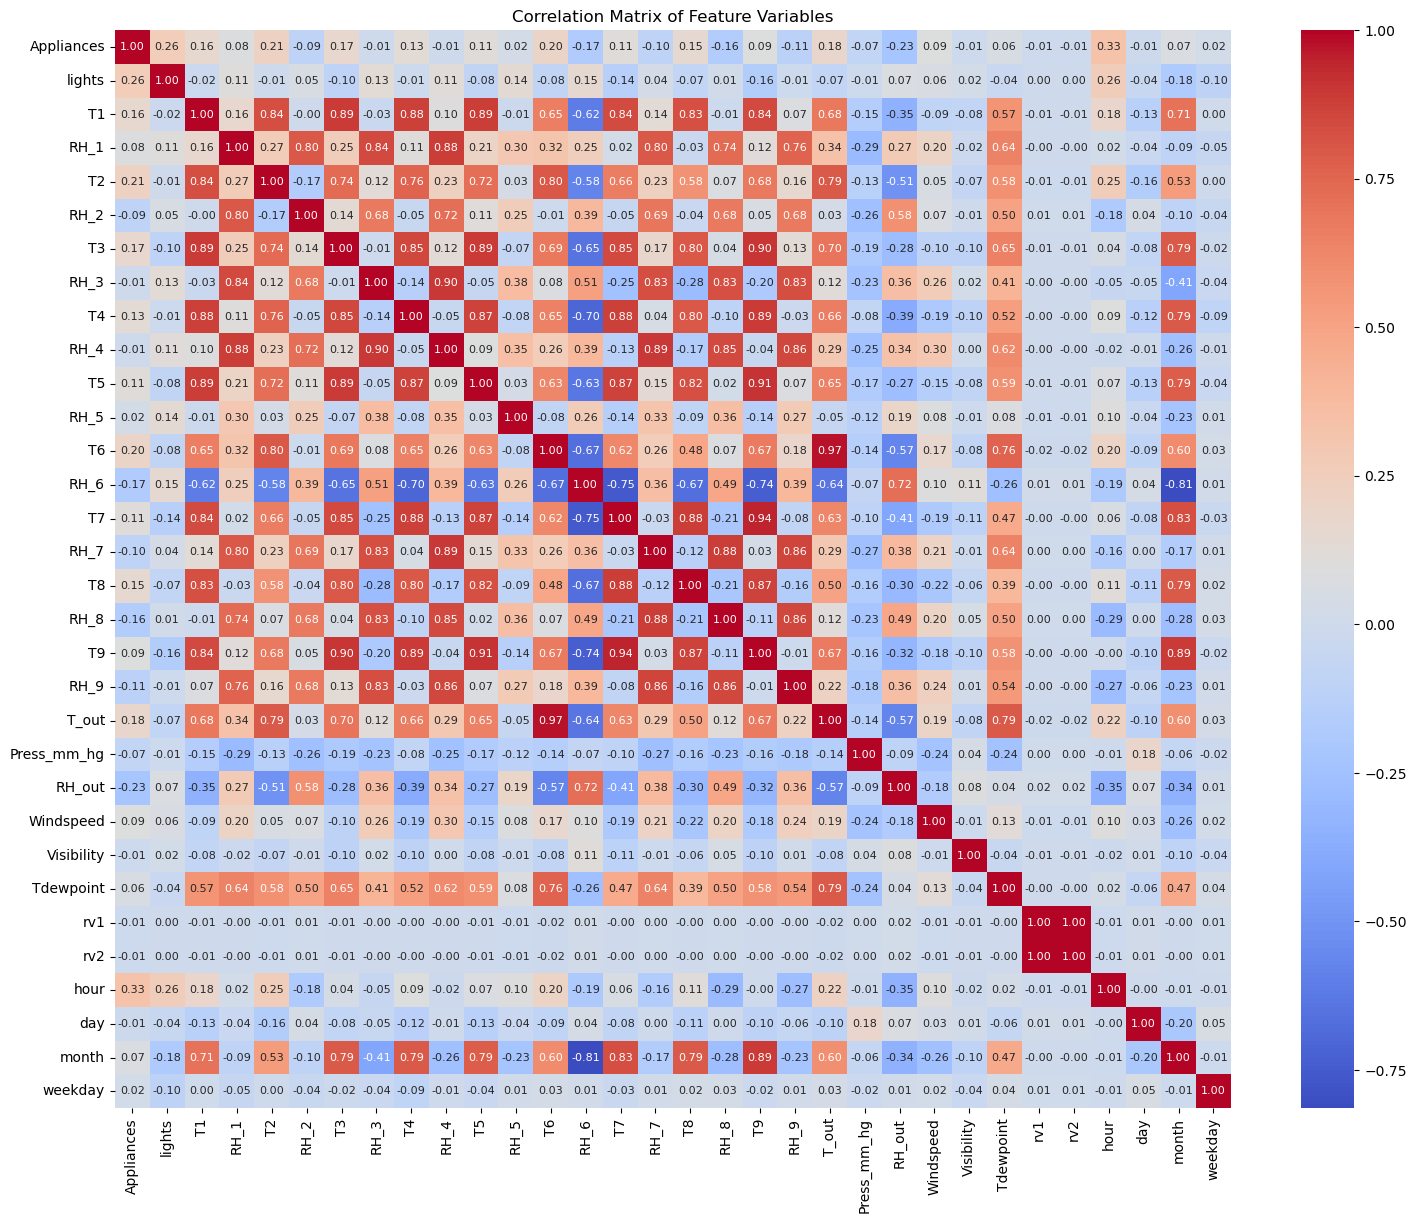

In [36]:
correlation_matrix = df.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, annot_kws={"size": 8})
plt.title("Correlation Matrix of Feature Variables")
plt.show()

In [38]:
# Define functions for correlation analysis
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    '''Get the top absolute correlations'''
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

top_correlations = get_top_abs_correlations(feature_variables, n=40)
top_correlations

rv1   rv2      1.000000
T6    T_out    0.974787
T7    T9       0.944776
T5    T9       0.911055
T3    T9       0.901324
RH_3  RH_4     0.898978
RH_4  RH_7     0.894301
T1    T3       0.892402
T4    T9       0.889439
T3    T5       0.888169
T1    T5       0.885247
RH_7  RH_8     0.883984
T7    T8       0.882123
RH_1  RH_4     0.880359
T4    T7       0.877763
T1    T4       0.877001
T4    T5       0.871813
T5    T7       0.870624
T8    T9       0.869338
RH_7  RH_9     0.858686
RH_4  RH_9     0.856591
RH_8  RH_9     0.855812
T3    T4       0.852778
      T7       0.847374
RH_4  RH_8     0.847259
T1    T9       0.844777
RH_1  RH_3     0.844677
T1    T7       0.838705
      T2       0.836834
RH_3  RH_9     0.833538
      RH_7     0.832685
      RH_8     0.828822
T1    T8       0.825413
T5    T8       0.824981
T2    T6       0.801186
RH_1  RH_7     0.801122
      RH_2     0.797535
T4    T8       0.796256
T3    T8       0.795283
T2    T_out    0.792255
dtype: float64

In [40]:
# Drop redundant features based on correlation analysis
features_to_drop = ['rv2', 'T6', 'T9', 'RH_8', 'lights']
df = df.drop(columns=features_to_drop)

print("Remaining features after dropping redundant ones:")
print(df.columns)

Remaining features after dropping redundant ones:
Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'hour', 'day', 'month', 'weekday'],
      dtype='object')


## Models Building

In [42]:
# Define features (X) and target (y)
X = df.drop(columns=['Appliances'])
y = df['Appliances']

In [44]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Feature scaling using StandardScaler
scaler = StandardScaler()

In [48]:
# Fit the scaler on the training data and then apply it to both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Ridge Regression

In [50]:
ridge_regression = Ridge(alpha=1.0)
ridge_regression.fit(X_train_scaled, y_train)

# Training and Testing R² Scores
ridge_training_score = ridge_regression.score(X_train_scaled, y_train)
ridge_testing_score = ridge_regression.score(X_test_scaled, y_test)

# Make predictions on the test set
target_pred_ridge = ridge_regression.predict(X_test_scaled)

# Calculate MAE and RMSE for Ridge Regression
ridge_mae = mean_absolute_error(y_test, target_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, target_pred_ridge))

print("Ridge Regression Performance:")
print(f"Training R² Score: {ridge_training_score:.4f}")
print(f"Testing R² Score: {ridge_testing_score:.4f}")
print(f"MAE (Test): {ridge_mae:.4f}")
print(f"RMSE (Test): {ridge_rmse:.4f}")

Ridge Regression Performance:
Training R² Score: 0.2291
Testing R² Score: 0.2271
MAE (Test): 0.4019
RMSE (Test): 0.5686


### KNeighbors Regressor

In [52]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)

# Training and Testing R² Scores
knn_training_score = knn_regressor.score(X_train_scaled, y_train)
knn_testing_score = knn_regressor.score(X_test_scaled, y_test)

# Make predictions on the test set
target_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate MAE and RMSE for KNN
knn_mae = mean_absolute_error(y_test, target_pred_knn)
knn_rmse = np.sqrt(mean_squared_error(y_test, target_pred_knn))

print("KNeighborsRegressor Performance:")
print(f"Training R² Score: {knn_training_score:.4f}")
print(f"Testing R² Score: {knn_testing_score:.4f}")
print(f"MAE (Test): {knn_mae:.4f}")
print(f"RMSE (Test): {knn_rmse:.4f}")

KNeighborsRegressor Performance:
Training R² Score: 0.7129
Testing R² Score: 0.5426
MAE (Test): 0.2940
RMSE (Test): 0.4374


### Random Forest Regressor

In [54]:
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train_scaled, y_train)

# Training and Testing R² Scores
rf_training_score = random_forest_regressor.score(X_train_scaled, y_train)
rf_testing_score = random_forest_regressor.score(X_test_scaled, y_test)

# Make predictions on the test set
target_pred_rf = random_forest_regressor.predict(X_test_scaled)

# Calculate MAE and RMSE for RandomForest
rf_mae = mean_absolute_error(y_test, target_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, target_pred_rf))

print("RandomForestRegressor Performance:")
print(f"Training R² Score: {rf_training_score:.4f}")
print(f"Testing R² Score: {rf_testing_score:.4f}")
print(f"MAE (Test): {rf_mae:.4f}")
print(f"RMSE (Test): {rf_rmse:.4f}")

RandomForestRegressor Performance:
Training R² Score: 0.9593
Testing R² Score: 0.7277
MAE (Test): 0.2232
RMSE (Test): 0.3375


### Gradient Boosting Regressor

In [56]:
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_regressor.fit(X_train_scaled, y_train)

# Training and Testing R² Scores
gb_training_score = gradient_boosting_regressor.score(X_train_scaled, y_train)
gb_testing_score = gradient_boosting_regressor.score(X_test_scaled, y_test)

# Make predictions on the test set
target_pred_gb = gradient_boosting_regressor.predict(X_test_scaled)

# Calculate MAE and RMSE for GradientBoosting
gb_mae = mean_absolute_error(y_test, target_pred_gb)
gb_rmse = np.sqrt(mean_squared_error(y_test, target_pred_gb))

print("GradientBoostingRegressor Performance:")
print(f"Training R² Score: {gb_training_score:.4f}")
print(f"Testing R² Score: {gb_testing_score:.4f}")
print(f"MAE (Test): {gb_mae:.4f}")
print(f"RMSE (Test): {gb_rmse:.4f}")

GradientBoostingRegressor Performance:
Training R² Score: 0.4690
Testing R² Score: 0.4325
MAE (Test): 0.3358
RMSE (Test): 0.4872


### SVR (Support Vector Regressor)

In [58]:
svr_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_regressor.fit(X_train_scaled, y_train)

# Training and Testing R² Scores
svr_training_score = svr_regressor.score(X_train_scaled, y_train)
svr_testing_score = svr_regressor.score(X_test_scaled, y_test)

# Make predictions on the test set
target_pred_svr = svr_regressor.predict(X_test_scaled)

# Calculate MAE and RMSE for SVR
svr_mae = mean_absolute_error(y_test, target_pred_svr)
svr_rmse = np.sqrt(mean_squared_error(y_test, target_pred_svr))

print("SVR Performance:")
print(f"Training R² Score: {svr_training_score:.4f}")
print(f"Testing R² Score: {svr_testing_score:.4f}")
print(f"MAE (Test): {svr_mae:.4f}")
print(f"RMSE (Test): {svr_rmse:.4f}")

SVR Performance:
Training R² Score: 0.5307
Testing R² Score: 0.4900
MAE (Test): 0.2920
RMSE (Test): 0.4618


## Models Evaluation

### Comparison of Models' Training and Testing, MAE & RMSE Scores


Comparison of Models' Performance Metrics:
                       Model  Training R² Score  Testing R² Score    MAE   RMSE
2      RandomForestRegressor             0.9593            0.7277 0.2232 0.3375
1        KNeighborsRegressor             0.7129            0.5426 0.2940 0.4374
4                        SVR             0.5307            0.4900 0.2920 0.4618
3  GradientBoostingRegressor             0.4690            0.4325 0.3358 0.4872
0            RidgeRegression             0.2291            0.2271 0.4019 0.5686


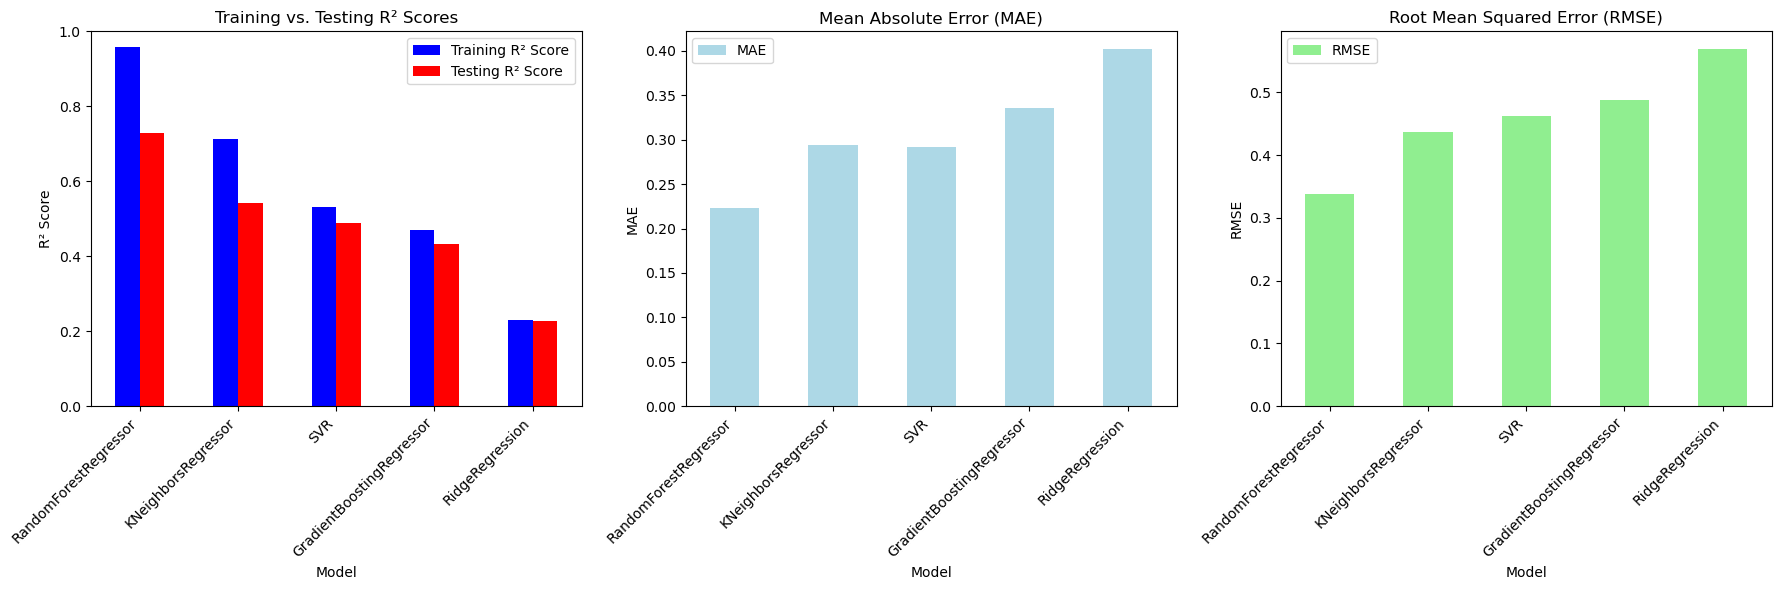

In [60]:
results = {
    'Model': [
        'RidgeRegression', 
        'KNeighborsRegressor', 
        'RandomForestRegressor', 
        'GradientBoostingRegressor', 
        'SVR'
    ],
    'Training R² Score': [
        ridge_training_score,
        knn_training_score,
        rf_training_score,
        gb_training_score,
        svr_training_score
    ],
    'Testing R² Score': [
        ridge_testing_score,
        knn_testing_score,
        rf_testing_score,
        gb_testing_score,
        svr_testing_score
    ],
    'MAE': [
        ridge_mae,
        knn_mae,
        rf_mae,
        gb_mae,
        svr_mae
    ],
    'RMSE': [
        ridge_rmse,
        knn_rmse,
        rf_rmse,
        gb_rmse,
        svr_rmse
    ]
}

# Create a DataFrame and sort by Testing R² Score
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Testing R² Score', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

# Display the DataFrame in a single row
pd.set_option('display.expand_frame_repr', False)
print("\nComparison of Models' Performance Metrics:")
print(results_df)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot R² Scores
results_df.plot(
    x='Model', 
    y=['Training R² Score', 'Testing R² Score'], 
    kind='bar', 
    ax=axes[0], 
    ylim=(0, 1), 
    colormap='bwr'
)
axes[0].set_title('Training vs. Testing R² Scores')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('R² Score')
axes[0].set_xticklabels(results_df['Model'], rotation=45, ha='right')

# Plot MAE
results_df.plot(
    x='Model', 
    y='MAE', 
    kind='bar', 
    ax=axes[1], 
    color='lightblue'
)
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('MAE')
axes[1].set_xticklabels(results_df['Model'], rotation=45, ha='right')

# Plot RMSE
results_df.plot(
    x='Model', 
    y='RMSE', 
    kind='bar', 
    ax=axes[2], 
    color='lightgreen'
)
axes[2].set_title('Root Mean Squared Error (RMSE)')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('RMSE')
axes[2].set_xticklabels(results_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Perform Cross-Validation across All Models

In [62]:
# List of models
models = [
    ('RidgeRegression', Ridge(alpha=1.0)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('RandomForestRegressor', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('GradientBoostingRegressor', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('SVR', SVR(kernel='rbf', C=1.0, epsilon=0.1))
]

# Prepare results dictionary
cv_results = {
    'Model': [],
    'Mean R²': [],
    'Mean MAE': [],
    'Mean RMSE': []
}

# Perform cross-validation for each model
for name, model in models:
    print(f"Performing cross-validation for {name}...")
    
    # R² Scores for Cross-Validation
    r2_scores = cross_val_score(model, X_train_scaled, y_train, scoring='r2', cv=5)
    
    # Predictions for Cross-Validation
    y_pred = cross_val_predict(model, X_train_scaled, y_train, cv=5)
    
    # Calculate MAE and RMSE for Cross-Validation
    mae = mean_absolute_error(y_train, y_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    
    # Store results
    cv_results['Model'].append(name)
    cv_results['Mean R²'].append(np.mean(r2_scores))
    cv_results['Mean MAE'].append(mae)
    cv_results['Mean RMSE'].append(rmse)

# Convert results to a DataFrame and display
cv_results_df = pd.DataFrame(cv_results)
cv_results_df = cv_results_df.sort_values(by='Mean R²', ascending=False)

print("\nCross-Validation Results:")
print(cv_results_df.to_markdown()) 

Performing cross-validation for RidgeRegression...
Performing cross-validation for KNeighborsRegressor...
Performing cross-validation for RandomForestRegressor...
Performing cross-validation for GradientBoostingRegressor...
Performing cross-validation for SVR...

Cross-Validation Results:
|    | Model                     |   Mean R² |   Mean MAE |   Mean RMSE |
|---:|:--------------------------|----------:|-----------:|------------:|
|  2 | RandomForestRegressor     |  0.675468 |   0.243971 |    0.369885 |
|  1 | KNeighborsRegressor       |  0.526684 |   0.30055  |    0.446591 |
|  4 | SVR                       |  0.476315 |   0.298879 |    0.469839 |
|  3 | GradientBoostingRegressor |  0.435127 |   0.332888 |    0.487953 |
|  0 | RidgeRegression           |  0.226589 |   0.401784 |    0.570908 |


### Hyper Parameter Tuning for Random Forest Regressor

In [64]:
# Define the parameter grid to search through
param_grid = {
    'model__n_estimators': [50, 100, 200],  # Number of trees
    'model__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'model__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'model__max_features': ['sqrt', 'log2']  # Number of features to consider at each split
}

# Initialize a pipeline with StandardScaler and RandomForestRegressor
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

# Set up the GridSearchCV to find the best hyperparameters for RandomForestRegressor
grid_search = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')


grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}


### Recalculate Performance Merics after Parameter Tuning 

In [66]:
# Extract the best estimator from the grid search
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Performance on Test Set after Fine-Tuning:")
print(f"R² Score: {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")

Performance on Test Set after Fine-Tuning:
R² Score: 0.7423
Mean Absolute Error (MAE): 0.2161
Root Mean Squared Error (RMSE): 0.3283


### Feature Importance

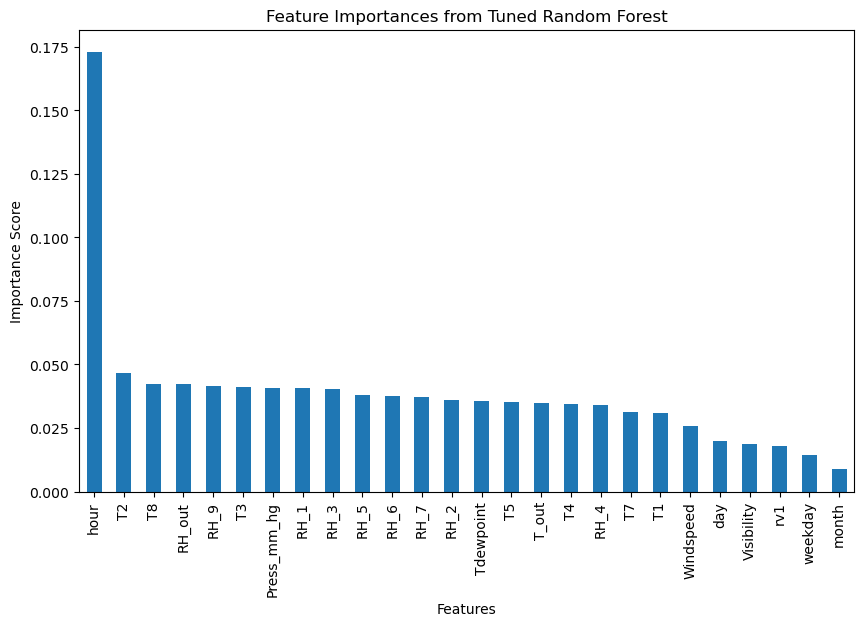

In [68]:
# Extract the RandomForestRegressor step from the pipeline
rf_model = best_rf_model.named_steps['model']

# Extract feature importances from the RandomForestRegressor
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importances from Tuned Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

### Drop Features below Threshold (0.02)

In [70]:
threshold = 0.02
important_features = feature_importances[feature_importances > threshold].index.tolist()
print("Features to retain:", important_features)
X_reduced = X[important_features]
print("Reduced feature set shape:", X_reduced.shape)

Features to retain: ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Tdewpoint', 'hour']
Reduced feature set shape: (19735, 21)


### Recalculate Performance Metrics after Reduced Features

In [72]:
# Apply feature reduction to the existing training and testing sets
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Set up the pipeline with StandardScaler and RandomForestRegressor with the best parameters
pipeline_reduced_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        max_features='sqrt',
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    ))
])
pipeline_reduced_rf.fit(X_train_reduced, y_train)
y_pred_reduced = pipeline_reduced_rf.predict(X_test_reduced)

test_r2_reduced = r2_score(y_test, y_pred_reduced)
test_mae_reduced = mean_absolute_error(y_test, y_pred_reduced)
test_rmse_reduced = np.sqrt(mean_squared_error(y_test, y_pred_reduced))

print("Performance on Test Set after Retraining with Reduced Feature Set:")
print(f"R² Score: {test_r2_reduced:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae_reduced:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse_reduced:.4f}")

Performance on Test Set after Retraining with Reduced Feature Set:
R² Score: 0.7451
Mean Absolute Error (MAE): 0.2146
Root Mean Squared Error (RMSE): 0.3265


### Performance Metrics Comparison for Random Forest Regressor

In [74]:
data = {
    'Metric': ['R² Score (Test)', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)'],
    'Before Hypertune': [0.7277, 0.2232, 0.3375],
    'After Hypertune (Full Feature Set)': [0.7423, 0.2161, 0.3283],
    'After Hypertune (Reduced Feature Set)': [0.7451, 0.2146, 0.3265]
}
performance_df_full = pd.DataFrame(data)
performance_df_full.set_index('Metric', inplace=True)

print("Performance Metrics Comparison for Random Forest Regressor:")
print(performance_df_full.to_markdown()) 

Performance Metrics Comparison for Random Forest Regressor:
| Metric                         |   Before Hypertune |   After Hypertune (Full Feature Set) |   After Hypertune (Reduced Feature Set) |
|:-------------------------------|-------------------:|-------------------------------------:|----------------------------------------:|
| R² Score (Test)                |             0.7277 |                               0.7423 |                                  0.7451 |
| Mean Absolute Error (MAE)      |             0.2232 |                               0.2161 |                                  0.2146 |
| Root Mean Squared Error (RMSE) |             0.3375 |                               0.3283 |                                  0.3265 |
